In [1]:
!mkdir data
!wget https://github.com/yk4r2/AAA/blob/main/Experiments/homeworks/HW2/data/banner_test_results.csv?raw=true -O data/banner_test_results.csv

--2021-04-14 09:33:14--  https://github.com/yk4r2/AAA/blob/main/Experiments/homeworks/HW2/data/banner_test_results.csv?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yk4r2/AAA/raw/main/Experiments/homeworks/HW2/data/banner_test_results.csv [following]
--2021-04-14 09:33:14--  https://github.com/yk4r2/AAA/raw/main/Experiments/homeworks/HW2/data/banner_test_results.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yk4r2/AAA/main/Experiments/homeworks/HW2/data/banner_test_results.csv [following]
--2021-04-14 09:33:14--  https://raw.githubusercontent.com/yk4r2/AAA/main/Experiments/homeworks/HW2/data/banner_test_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import json
from scipy import stats as st

### Домашнее задание 2. Интерпретация результатов АБ-теста

Срок сдачи: 25 марта 18:00

На мобильной версии Авито провели тест на добавление рекламного баннера на карточку товара между описанием и блоком рекомендаций.

Продуктовая гипотеза:
Добавление рекламного баннера будет приводить к увеличению выручки без ущерба пользовательскому опыту.

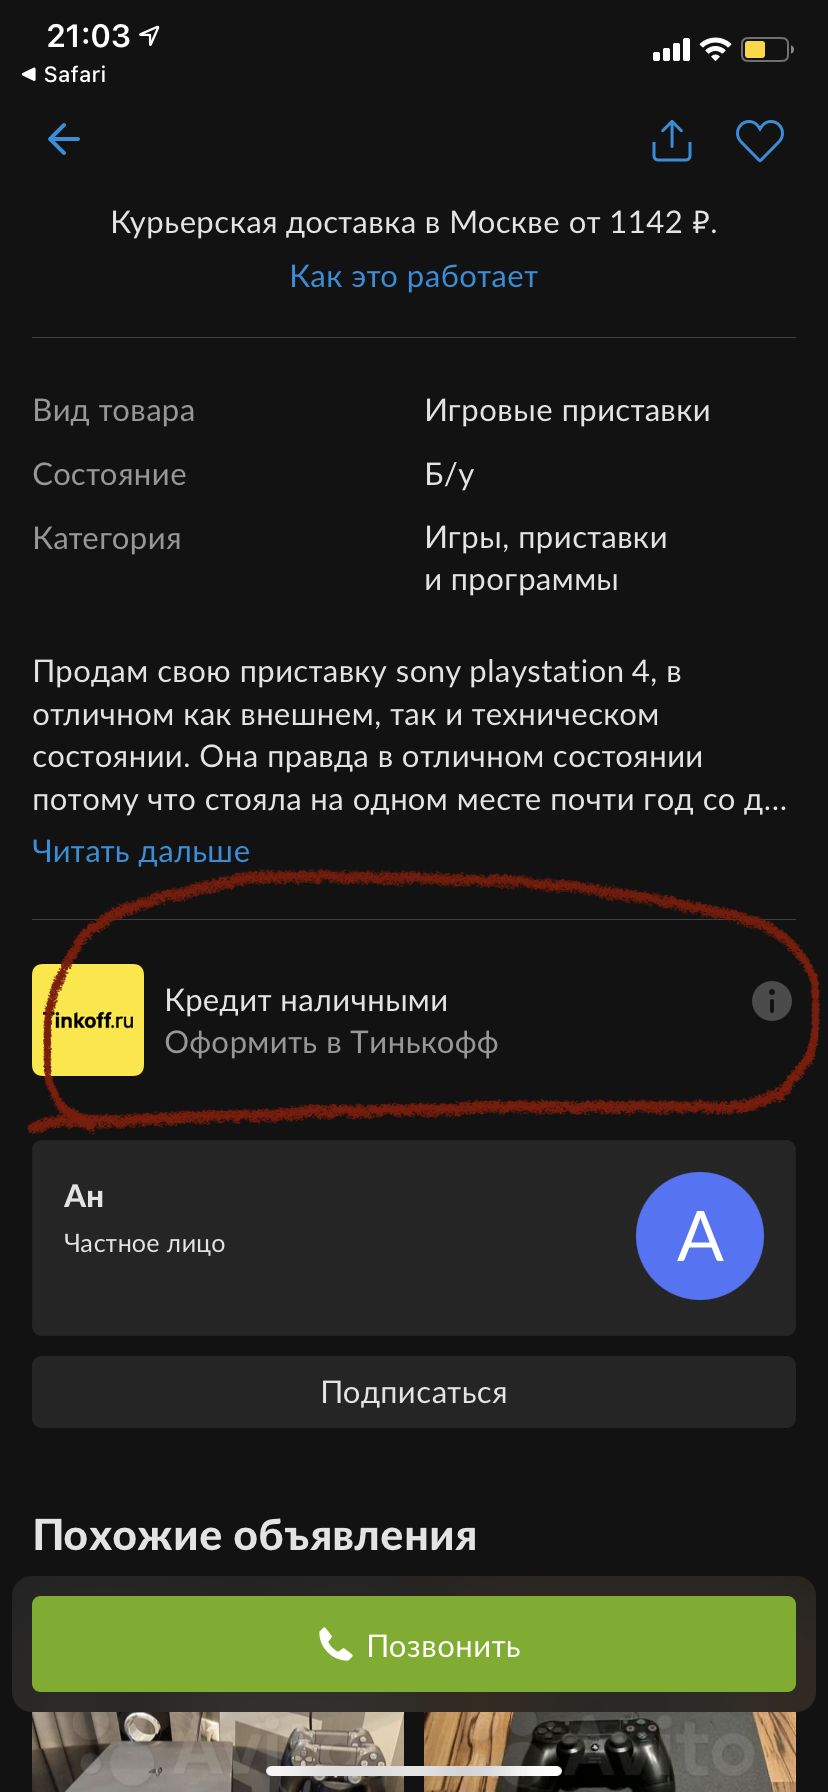

## Задание:

1. Загрузите файл с данными, собранными за время аб теста.

2. На основе имеющихя в файле метрик формализуйте продуктовую гипотезу. Попробуйте сформировать ratio-метрики, метрики аггрегированные по пользователям(например, количество пользователей совершивших контакт) и при анализе теста понаблюдайте за их чувтсвительностью. (2 балла)

3.  Используя критерии Стьюдента и Манна-Уитни, проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01. Везде ли результаты применения критериев совпадают? (2 балла)

4.  Выборка разделена на 200 бакетов. Примените к бакетам критерии Стьюдента и Манна-Уитни к бакетам и проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01. Сравните результаты с предыдущим пунктом. (1 балл)

5. Исключите из бакетов топ 1% в каждой группе и снова примените критерии. Сравните результаты с предыдущим пунктом. (1 балл)

6. На основе текущих метрик сформируйте ratio-метрики, которые могут добавить информации. Для анализа их изменений воспольуйтесь Бутстрэпом. Являются ли эти метрики более чувствительными, чем базовые метрики? (2 балла)

7. Проинтерпретируйте результаты и сделайте выводы об изменениях для продукта. Рекомендуете ли вы изменение к запуску на 100% пользователей? (2 балла)

Формат данных

- `cookie_id` - ид пользователя
- `split_group`	- тестовая группа
- `searches` - количество поисков
- `item_views` - количество просмотров объявлений
- `contacts` - количество контактов пользователя с продавцом	
- `rec_item_views` - количество просмотров объявлений с рекомендацией
- `rec_contacts` - контакты с рекомендацией
- `contact_cookie` - пользователь, совершил контакт
- `advertising_clicks` - клики на рекламу
- `bucket` - бакет

## Вопрос 1
Загрузите файл с данными, собранными за время аб теста.

In [3]:
df = pd.read_csv('./data/banner_test_results.csv')

In [4]:
df.head()

,cookie_id,split_group,searches,item_views,contacts,rec_item_views,rec_contacts,contact_cookie,advertising_clicks,bucket
0,213390502790,control,520,1430,39,182,0,1,0,190
1,215392005062,test,0,1,0,0,0,0,0,62
2,216554007966,control,0,120,36,8,4,1,0,166
3,216685275920,control,0,361,0,0,0,0,0,120
4,219571003965,test,0,720,0,64,0,0,0,165


In [5]:
df.describe()

,cookie_id,searches,item_views,contacts,rec_item_views,rec_contacts,contact_cookie,advertising_clicks,bucket
count,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06,1.027749e+06
mean,3.374912e+12,9.299572e+01,6.713660e+02,1.153405e+01,4.090375e+01,4.589691e-01,1.489761e-01,4.024533e-01,9.945975e+01
std,8.433434e+11,1.977909e+03,4.107055e+03,3.388446e+02,5.527093e+02,1.954089e+01,3.560650e-01,1.350794e+01,5.776151e+01
min,5.898517e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.322550e+12,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01
50%,3.730745e+12,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e+01
75%,3.905567e+12,2.000000e+00,1.400000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+02
max,3.967647e+12,1.431396e+06,4.679680e+05,1.336170e+05,1.291660e+05,7.623000e+03,1.000000e+00,8.340000e+03,1.990000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027749 entries, 0 to 1027748
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   cookie_id           1027749 non-null  int64 
 1   split_group         1027749 non-null  object
 2   searches            1027749 non-null  int64 
 3   item_views          1027749 non-null  int64 
 4   contacts            1027749 non-null  int64 
 5   rec_item_views      1027749 non-null  int64 
 6   rec_contacts        1027749 non-null  int64 
 7   contact_cookie      1027749 non-null  int64 
 8   advertising_clicks  1027749 non-null  int64 
 9   bucket              1027749 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 78.4+ MB


In [7]:
any(df['cookie_id'].duplicated())

True

Значит, надо сгруппировать по cookie_id

In [9]:
summ_agg = ['searches', 'item_views', 'contacts', 'rec_item_views', 'rec_contacts', 'contact_cookie', 'advertising_clicks', 'bucket']
agg_dict = {i: np.sum for i in summ_agg}
agg_dict['split_group'] = lambda x: x.max()
df = df.groupby('cookie_id').agg(agg_dict)

In [10]:
any(df.index.duplicated())

False

seaborn отказался работать с таким огромным датасетом, но мы его заставим.

In [11]:
hash = pd.util.hash_pandas_object(df.index)
df_sns = df.drop(['bucket'], axis=1)
df_sns['hash'] = hash
df_sns = df_sns[df_sns['hash'] % 100 == 1]
df_sns.drop(['hash'], axis=1, inplace=True)

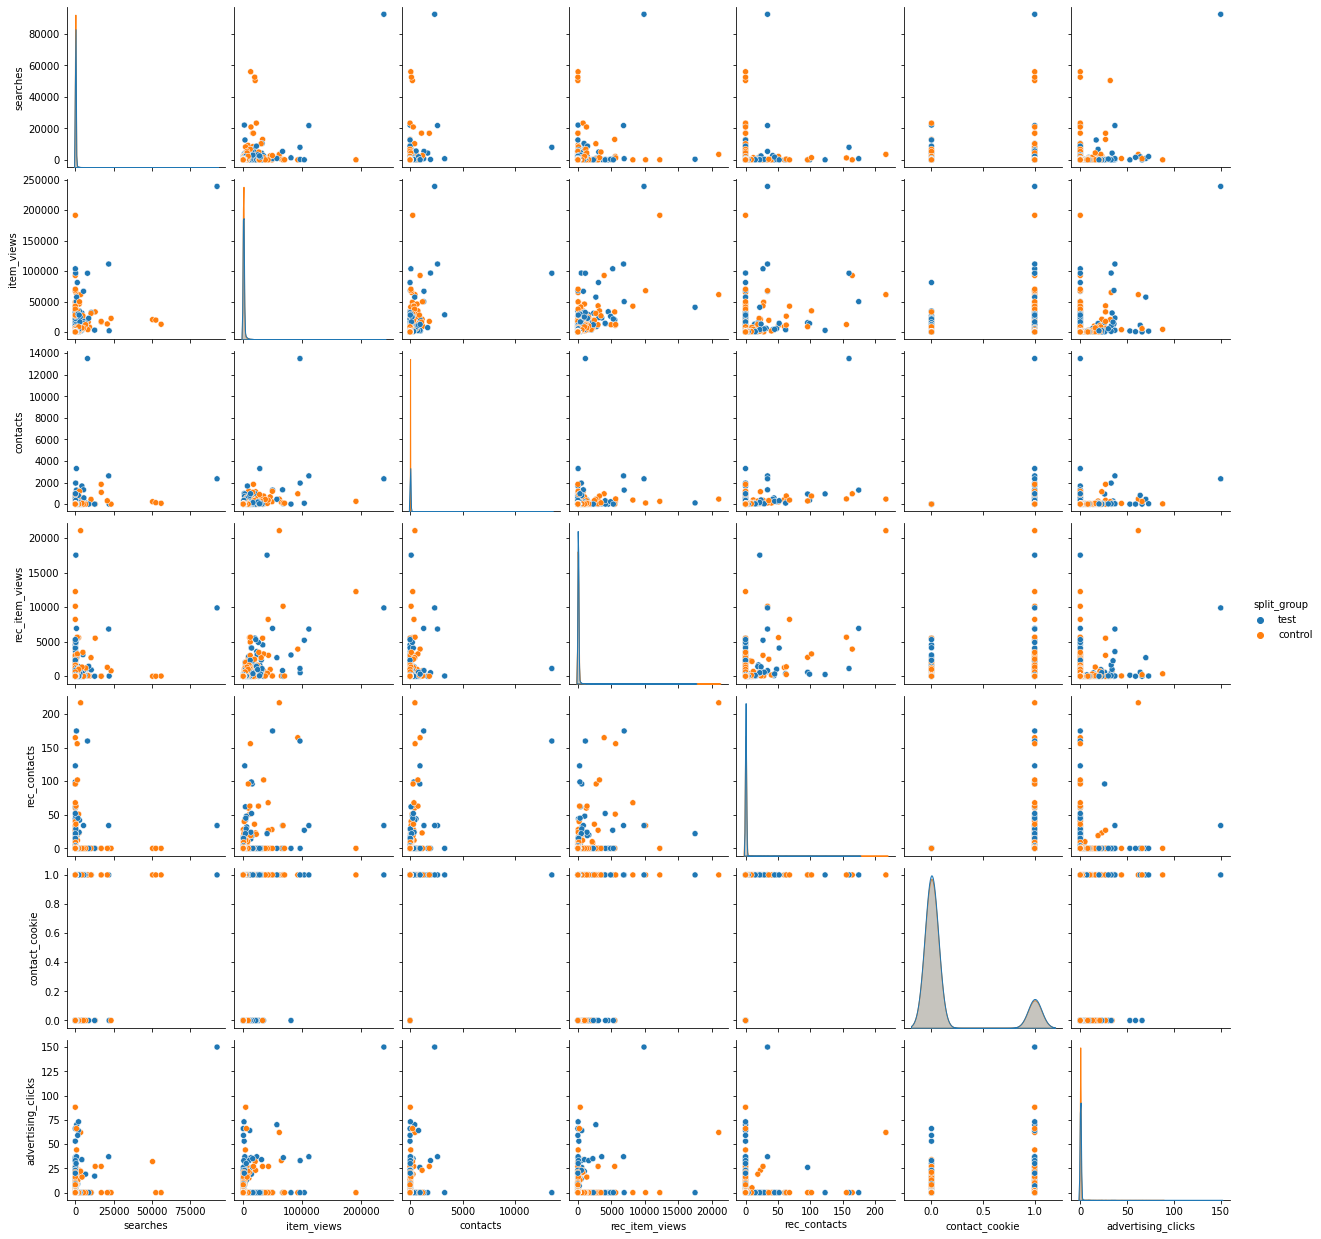

In [12]:
sns.pairplot(df_sns, hue='split_group')

Блин, оно строится уже 20 минут, а я урезал датасет в 100 раз(


Выглядит как логарифм на самом деле

In [13]:
from scipy.stats import skew

numeric_feats = df_sns.dtypes[df_sns.dtypes != "object"].index

skewed_feats = df_sns[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.85]
skewed_feats = skewed_feats.index

df_sns[skewed_feats] = np.log1p(df_sns[skewed_feats])

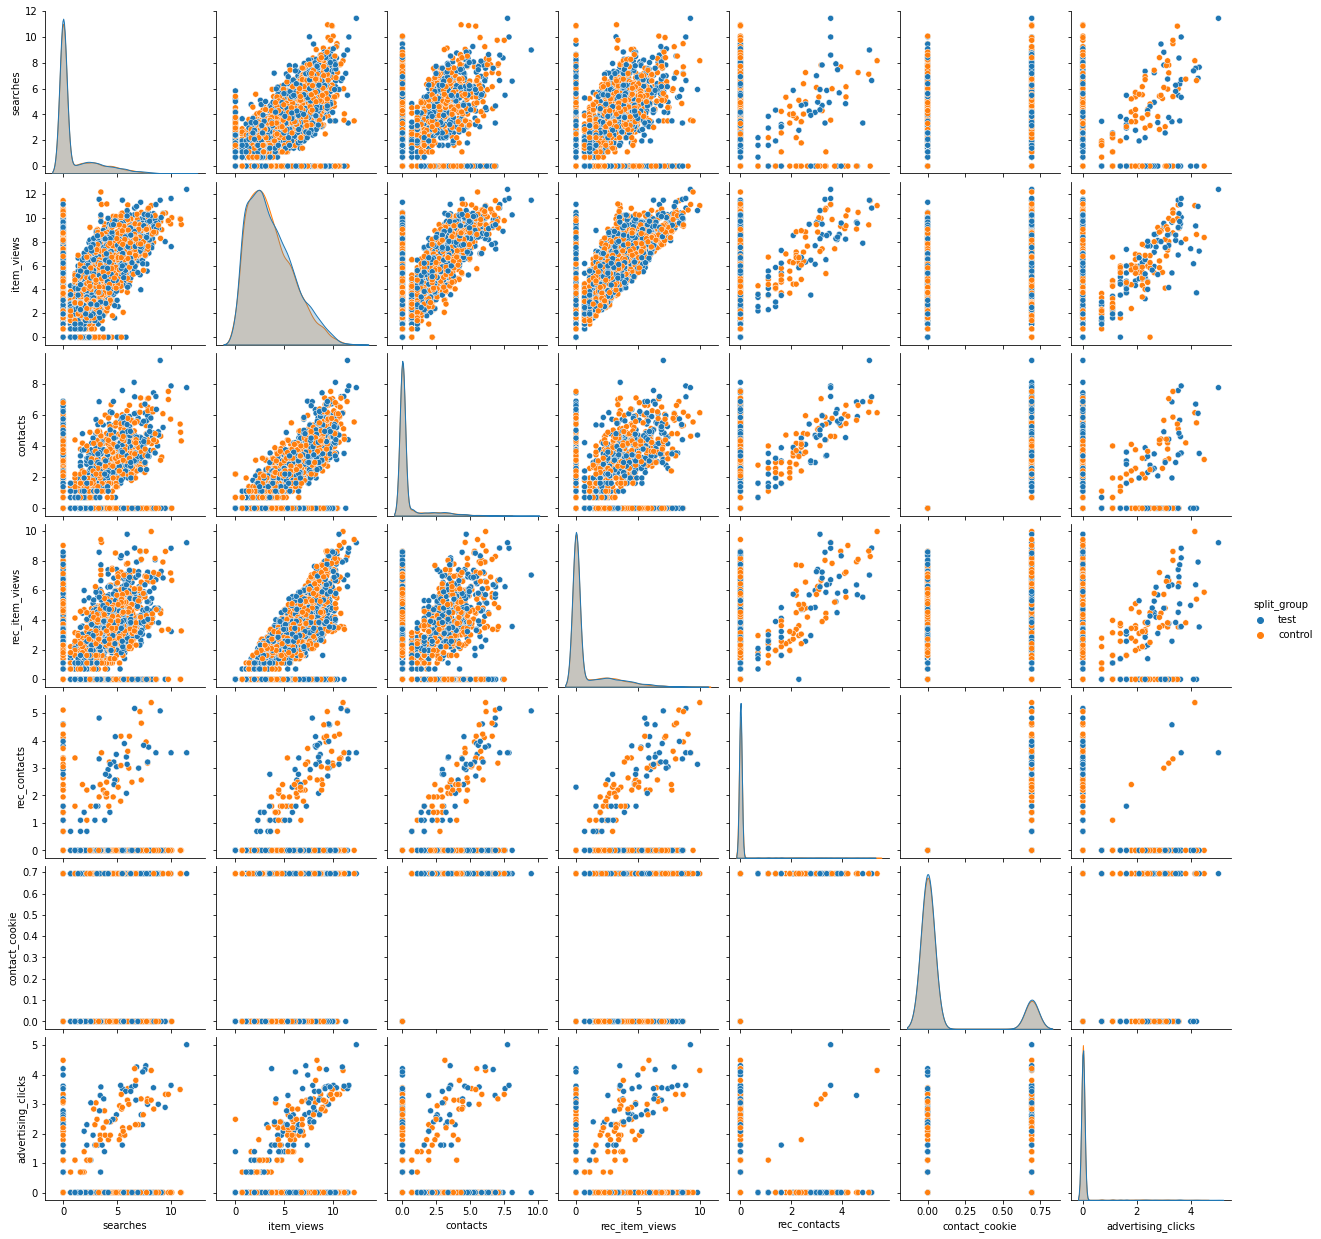

In [14]:
sns.pairplot(df_sns, hue='split_group')

## Вопрос 2
На основе имеющихcя в файле метрик формализуйте продуктовую гипотезу. Попробуйте сформировать ratio-метрики, метрики аггрегированные по пользователям(например, количество пользователей совершивших контакт) и при анализе теста понаблюдайте за их чувтсвительностью. (2 балла)

$H_0$: {выручка увеличилась} $\cap$  {пользовательский опыт не изменился}

- Увеличение выручки можно понять по ненулевым `advertising_clicks` -- выручка от рекламы, а вот по остальным метрикам понять сложновато. Будем мерять выручку от рекламного баннера.
- Изменение пользовательского опыта должно отслеживаться остальными метриками: во-первых, может снизиться количество контактов (`contacts`), на количество поисков особенно не смотрим (вряд ли люди оттекут за пару недель на тест), плюс у нас сдвинулся вниз блок рекомендаций, поэтому надо посмотреть ещё и на него (`contact_cookies`, `rec_contacts`)

Введём ratio-метрику: возьмём конверсию контактов с захода

In [26]:
df['contacts_conv'] = (df['contacts'] / df['advertising_clicks']).replace([np.inf, -np.inf], np.nan).fillna(0)

## Вопрос 3

Используя критерии Стьюдента и Манна-Уитни, проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01. Везде ли результаты применения критериев совпадают? (2 балла)

In [41]:
pd.DataFrame.from_dict(metrics_dict, orient='index').T

,metric,difference,ttest,mw
0,searches,0,1,0.5


In [35]:
metrics_dict

{'difference': 0.0,
 'metric': 'searches',
 'mw': 0.49999999829239955,
 'ttest': 1.0}

In [83]:
criterions = pd.DataFrame(columns=['metric', 'difference', 'ttest', 'mw'])
numeric_feats = df.drop(['contact_cookie', 'bucket'], axis=1).dtypes[df.dtypes != "object"].index

for metric in numeric_feats:
    test_metric = df[df.split_group == 'test'][metric]
    control_metric = df[df.split_group == 'control'][metric]
    metrics_dict = {
        'metric': metric,
        'difference': (test_metric.mean() - control_metric.mean()) / control_metric.mean(),
        'ttest': st.ttest_ind(test_metric, control_metric)[1],
        'mw': st.mannwhitneyu(test_metric, control_metric)[1],
        }
    metrics = pd.DataFrame.from_dict(metrics_dict, orient='index').T
    criterions = pd.concat([criterions, metrics], ignore_index=True)

criterions.index = criterions['metric']
criterions = criterions.drop('metric', axis=1)

In [84]:
criterions

,difference,ttest,mw
metric,,,
searches,0.0364121,0.39409,0.00132432
item_views,0.00635287,0.599698,6.96651e-14
contacts,0.127725,0.0383583,1.10766e-41
rec_item_views,-0.0482946,0.0633463,1.05705e-36
rec_contacts,-0.0647563,0.425529,0.000307225
advertising_clicks,0.0664992,0.331131,0.00674496
contacts_conv,0.144596,0.398894,0.170174


In [75]:
criterions_99 = pd.DataFrame(columns=['metric', 'difference', 'ttest_p', 'mw_p'])
numeric_feats = df.drop(['contact_cookie', 'bucket'], axis=1).dtypes[df.dtypes != "object"].index

for metric in numeric_feats:
    test_99_quantile = df[metric] < np.quantile(df[df.split_group == 'test'][metric], 0.99)
    test_metric_99 = df[((df.split_group == 'test') & test_99_quantile)][metric]

    control_99_quantile = df[metric] < np.quantile(df[df.split_group == 'control'][metric], 0.99)
    control_metric_99 = df[(df.split_group == 'control') & control_99_quantile][metric]

    metrics_dict = {
        'metric': metric,
        'difference': (test_metric_99.mean() - control_metric_99.mean()) / control_metric_99.mean(),
        'ttest_p': st.ttest_ind(test_metric_99, control_metric_99)[1],
        'mw_p': st.mannwhitneyu(test_metric_99, control_metric_99)[1],
        }

    metrics = pd.DataFrame.from_dict(metrics_dict, orient='index').T
    criterions_99 = pd.concat([criterions_99, metrics], ignore_index=True)

criterions_99.index = criterions_99['metric']
criterions_99 = criterions_99.drop('metric', axis=1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [76]:
criterions_99

,difference,ttest_p,mw_p
metric,,,
searches,-0.00308609,0.72569,0.00103696
item_views,-0.00042719,0.949032,3.02131e-14
contacts,0.0297751,0.00168665,9.24185e-45
rec_item_views,-0.0652753,6.42814e-15,1.17206e-38
rec_contacts,-0.424404,1.34197e-32,1.07665e-16
advertising_clicks,-0.112766,4.0185e-05,4.25142e-06
contacts_conv,NaN,NaN,0


In [78]:
criterions

,difference,ttest,mw
metric,,,
searches,0.0364121,0.39409,0.00132432
item_views,0.00635287,0.599698,6.96651e-14
contacts,0.127725,0.0383583,1.10766e-41
rec_item_views,-0.0482946,0.0633463,1.05705e-36
rec_contacts,-0.0647563,0.425529,0.000307225
advertising_clicks,0.0664992,0.331131,0.00674496
contacts_conv,0.144596,0.398894,0.170174


Выводы по обычным результатам:
- Не очень понятно, зачем тут использовать Стьюдента, ибо очень много значений с outlier'ами.
- `searches`: статзначимо значительно выросли (на 3%)
- `item_views`: статзначимо выросли
- `contacts`: статзначимо выросли, причём очень круто: на 10%
- `rec_item_views` и `rec_contacts`: мы значимо просадили их, ибо они стали чуть ниже, чем раньше. Ожидаемо, но всё равно невкусно.
- про `advertising_clicks` и `contacts_conv` можно сказать. что они подросли, но не сильно-то значимо.

In [79]:
criterions_99

,difference,ttest_p,mw_p
metric,,,
searches,-0.00308609,0.72569,0.00103696
item_views,-0.00042719,0.949032,3.02131e-14
contacts,0.0297751,0.00168665,9.24185e-45
rec_item_views,-0.0652753,6.42814e-15,1.17206e-38
rec_contacts,-0.424404,1.34197e-32,1.07665e-16
advertising_clicks,-0.112766,4.0185e-05,4.25142e-06
contacts_conv,NaN,NaN,0


Выводы по результатам со срезанным 1%:
- ratio-метрика какая-то странная, ну и пока забьём на неё. Судя по длине ненулевых значений, там огромный скос в сторону нулей, поэтому всё остальное входит в 1%, вот мы его и отрезали.
- `searches`, `item_views`: есть небольшое падение, но настолько незначительное, что можно не париться
- `contacts` выросли довольно значимо. Неплохо.
- `rec_item_views` просели на 6.5%, что в целом неприятно, но ожидаемо
- А вот с `rec_contacts` всё не так радужно: просадка на целых 42% с околонулевым pvalue. Заставляет задуматься.
- `advertising_clicks` тоже подпросели, что не есть good.

## Вопрос 4

Выборка разделена на 200 бакетов. Примените критерии Стьюдента и Манна-Уитни к бакетам и проинтерпретируйте как изменились средние выборок для выбранных вами метрик. Используйте уровень значимости 0.01. Сравните результаты с предыдущим пунктом. (1 балл)

In [80]:
bucketed_df = df[(df['advertising_clicks'] < np.quantile(df['advertising_clicks'], 0.99))]
bucketed_df = bucketed_df.drop('contact_cookie', axis=1).groupby(['split_group', 'bucket']).mean().reset_index()

In [91]:
criterions = pd.DataFrame(columns=['metric', 'difference', 'ttest', 'mw'])
numeric_feats = bucketed_df.drop(['bucket'], axis=1).dtypes[bucketed_df.dtypes != "object"].index

for metric in numeric_feats:
    test_metric = bucketed_df[bucketed_df.split_group == 'test'][metric]
    control_metric = bucketed_df[bucketed_df.split_group == 'control'][metric]
    metrics_dict = {
        'metric': metric,
        'difference': (test_metric.mean() - control_metric.mean()) / control_metric.mean(),
        'ttest': st.ttest_ind(test_metric, control_metric)[1],
        'mw': st.mannwhitneyu(test_metric, control_metric)[1],
        }
    metrics = pd.DataFrame.from_dict(metrics_dict, orient='index').T
    criterions = pd.concat([criterions, metrics], ignore_index=True)

criterions.index = criterions['metric']
criterions = criterions.drop('metric', axis=1)

In [92]:
criterions

,difference,ttest,mw
metric,,,
searches,-0.00801204,0.879206,0.265048
item_views,-0.0271128,0.492639,0.32991
contacts,0.252758,0.0869813,0.0858318
rec_item_views,-0.144582,0.0135775,0.0130149
rec_contacts,0.175144,0.606824,0.069464
advertising_clicks,0.00200905,0.986275,0.327372
contacts_conv,0.76322,0.157366,0.339998


## Вопрос 5

Исключите из бакетов топ 1% в каждой группе и снова примените критерии. Сравните результаты с предыдущим пунктом. (1 балл)

In [87]:
criterions_99 = pd.DataFrame(columns=['metric', 'difference', 'ttest_p', 'mw_p'])
numeric_feats = bucketed_df.drop('bucket', axis=1).dtypes[bucketed_df.dtypes != "object"].index

for metric in numeric_feats:
    test_99_quantile = bucketed_df[metric] < np.quantile(bucketed_df[bucketed_df.split_group == 'test'][metric], 0.99)
    test_metric_99 = bucketed_df[((bucketed_df.split_group == 'test') & test_99_quantile)][metric]

    control_99_quantile = bucketed_df[metric] < np.quantile(bucketed_df[bucketed_df.split_group == 'control'][metric], 0.99)
    control_metric_99 = bucketed_df[(bucketed_df.split_group == 'control') & control_99_quantile][metric]

    metrics_dict = {
        'metric': metric,
        'difference': (test_metric_99.mean() - control_metric_99.mean()) / control_metric_99.mean(),
        'ttest_p': st.ttest_ind(test_metric_99, control_metric_99)[1],
        'mw_p': st.mannwhitneyu(test_metric_99, control_metric_99)[1],
        }

    metrics = pd.DataFrame.from_dict(metrics_dict, orient='index').T
    criterions_99 = pd.concat([criterions_99, metrics], ignore_index=True)

criterions_99.index = criterions_99['metric']
criterions_99 = criterions_99.drop('metric', axis=1)

In [88]:
criterions_99

,difference,ttest_p,mw_p
metric,,,
searches,-0.0363552,0.351699,0.261857
item_views,-0.0192429,0.621303,0.328099
contacts,0.138205,0.0158742,0.0832459
rec_item_views,-0.0922363,0.0233029,0.0121113
rec_contacts,-0.166934,0.0166985,0.0662114
advertising_clicks,0.00208043,0.986045,0.324681
contacts_conv,0.166642,0.401419,0.333948


Тут почему-то всё вышло не статзначимым. Ужас.

## Вопрос 6

На основе текущих метрик сформируйте ratio-метрики, которые могут добавить информации. Для анализа их изменений воспольуйтесь Бутстрэпом. Являются ли эти метрики более чувствительными, чем базовые метрики? (2 балла)

В общем, этот пункт у меня не получился, подозреваю, что это из-за того, что я навесил-таки логарифм на распределения данных.

In [111]:
def stat_intervals(stat, alpha = 0.05):
    return np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])

def get_ratio(x1, x2, rand_item):
    return x1[rand_item].sum() / x2[rand_item].sum()

def get_bootstrap_samples(x1,
                          x2,
                          n_samples,
                          custom_func = np.mean,
                          ):
    a = []
    for i in range(n_samples):
        a.append(custom_func(x1, x2, np.random.randint(0, len(x1), len(x1))))
    return np.array(a)

Посмотрим на CI для конверсии контактов из захода

In [130]:
test_df = bucketed_df[(bucketed_df.split_group=='test')].reset_index()
control_df = bucketed_df[(bucketed_df.split_group=='control')].reset_index()

smp_1 = get_bootstrap_samples(test_df.contacts, test_df.advertising_clicks, 10000, get_ratio)
smp_2 = get_bootstrap_samples(control_df.contacts, test_df.advertising_clicks, 10000, get_ratio)

In [132]:
min(smp_1), min(smp_2)

(4.7334867138598, 4.1867305846529)

In [133]:
stat_intervals((smp_1 - smp_2) / smp_1, 0.01).sum()

0.2303848701424967

Похоже прокрасилась

Глянем ещё на конверсию из поиска в контакты

In [135]:
smp_1 = get_bootstrap_samples(test_df.contacts, test_df.searches, 10000, get_ratio)
smp_2 = get_bootstrap_samples(control_df.contacts, test_df.searches, 10000, get_ratio)

In [136]:
min(smp_1), min(smp_2)

(0.0972090334754473, 0.08663886514918612)

In [137]:
stat_intervals((smp_1 - smp_2) / smp_1, 0.01).sum()

0.38283996043262963

Тоже прокрасилась, но не так сильно.

## Вопрос 7

Проинтерпретируйте результаты и сделайте выводы об изменениях для продукта. Рекомендуете ли вы изменение к запуску на 100% пользователей? (2 балла)

Обычные анализ метрик даёт вроде положительный результат, но если отбросить выбросы, всё становится не так радужно.

Пытаемся помочь себе бакетированием, но, видимо, ему помешал логарифм на хвостатых данных, и вместо улучшения мы как будто ухудшили результат.

Тогда заюзали bootstrap, который сказал, что скорее всего отклонение действительно произошло (ну по факту мы можем получить CI для обычных метрик и сравнить с ним, поняв, что для ratio метрик он меньше -> они чувствительней)

Вообще я бы рекомендовал проконсультироваться с ребятами, которые шарят за то, насколько нам важно не смещать элементы с рекомендациями и т.д. вниз, а ещё с рекламщиками, ибо возможно этот эксперимент просадит рекламу. Ы.